In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:/Users/Admin/Downloads/final2.csv',encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(406829, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
temp_df=df[df['Quantity']<=0]
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [11]:
df=df[df['Quantity']>=0]


In [12]:
df.shape

(397924, 8)

In [13]:
df['InvoiceNo']=df['InvoiceNo'].astype('int64')

In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Hour']=df['InvoiceDate'].dt.hour
df['Minute']=df['InvoiceDate'].dt.minute
df['Date']=df['InvoiceDate'].dt.date

In [15]:
df['TotalSales']=df['Quantity']*df['UnitPrice']

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Minute,Date,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,26,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,26,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34


In [17]:
df.drop('InvoiceDate',axis=1,inplace=True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,Minute,Date,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,8,26,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,8,26,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,8,26,2010-12-01,20.34


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  int64  
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   UnitPrice    397924 non-null  float64
 5   CustomerID   397924 non-null  float64
 6   Country      397924 non-null  object 
 7   Hour         397924 non-null  int64  
 8   Minute       397924 non-null  int64  
 9   Date         397924 non-null  object 
 10  TotalSales   397924 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 36.4+ MB


In [20]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month

In [21]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Hour,Minute,TotalSales,Month
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,12.728247,30.408013,22.394749,7.612537
std,13106.167695,180.420210,22.096788,1713.169877,2.273535,17.078163,309.055588,3.416527
min,536365.000000,1.000000,0.000000,12346.000000,6.000000,0.000000,0.000000,1.000000
25%,549234.000000,2.000000,1.250000,13969.000000,11.000000,16.000000,4.680000,5.000000
50%,561893.000000,6.000000,1.950000,15159.000000,13.000000,31.000000,11.800000,8.000000
75%,572090.000000,12.000000,3.750000,16795.000000,14.000000,45.000000,19.800000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,20.000000,59.000000,168469.600000,12.000000


<AxesSubplot:>

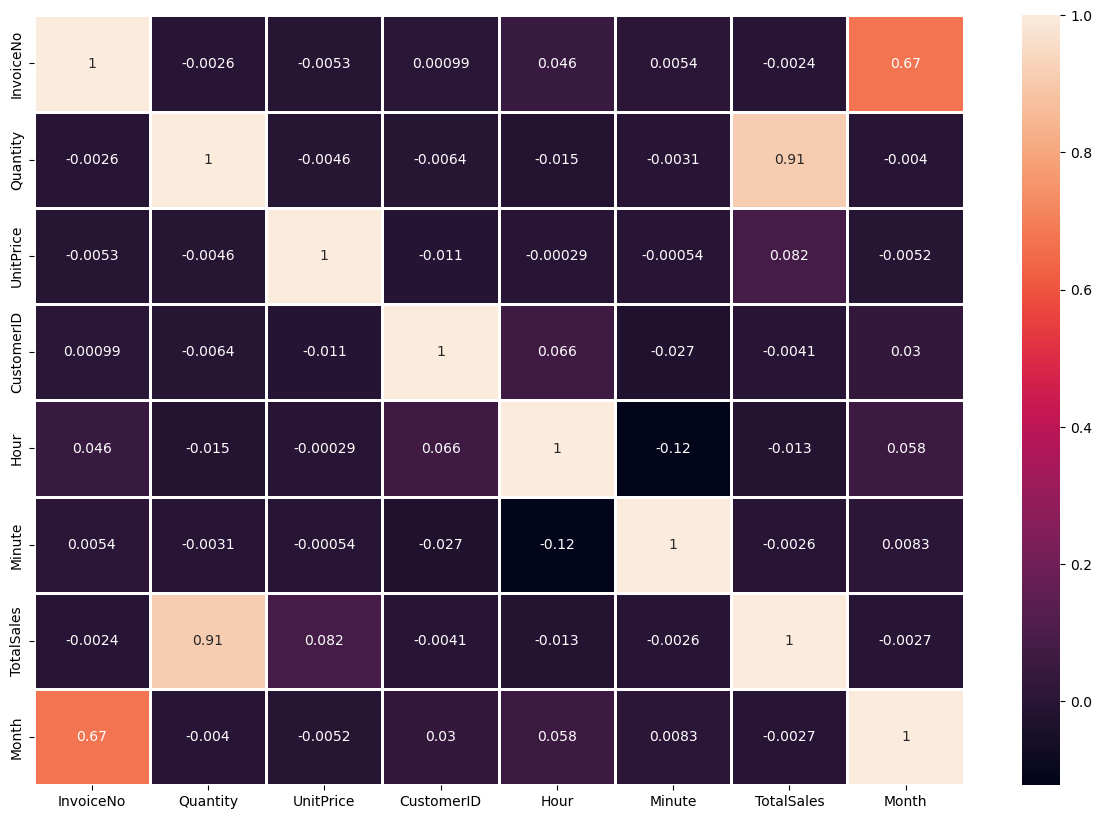

In [22]:
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(df.corr(),annot=True,
    fmt='.2g',
    linewidths=1,
    linecolor='white',)


In [23]:
month_res=df.groupby('Month').sum()
month_res

,InvoiceNo,Quantity,UnitPrice,CustomerID,Hour,Minute,TotalSales
Month,,,,,,,
1,11494425767,349147,66964.990,321904509.0,269638,650509,569445.040
2,10841971448,265638,63185.760,305225091.0,248532,600398,447137.350
3,14861868543,348544,88563.100,412680258.0,339638,835160,595500.760
4,12453962628,292225,79005.481,345952584.0,284246,658581,469200.361
5,15670797067,373685,102128.280,431158808.0,354898,854403,678594.560
6,15138257658,363699,85274.730,416663110.0,345095,815537,661213.690
7,15031174415,369432,75919.901,410703863.0,339948,800072,600091.011
8,15219567760,398938,79423.830,412144474.0,344380,838891,645343.900
9,22703501295,544899,119053.062,610894038.0,508688,1232191,952838.382


<BarContainer object of 12 artists>

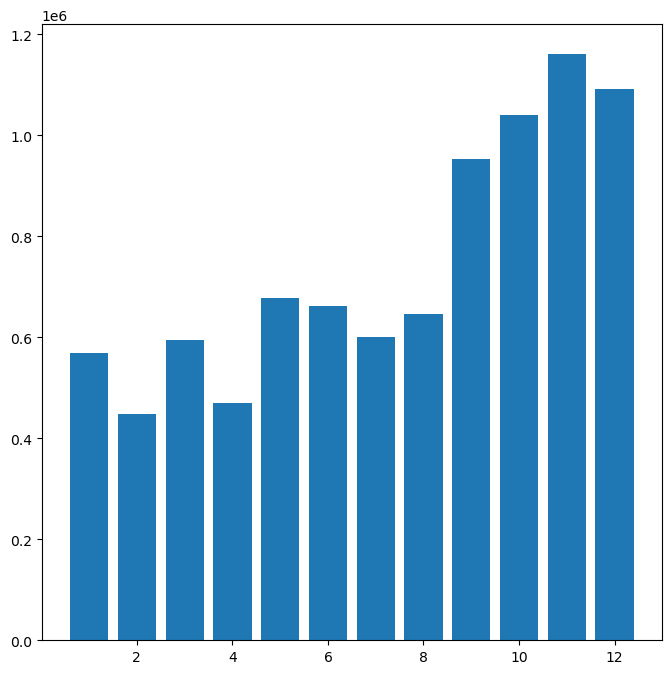

In [24]:
plt.figure(figsize=(8,8))
months=range(1,13)
plt.bar(months,month_res['TotalSales'])

In [25]:
# which product high sales
prod_sales=df.groupby('Description').sum()['TotalSales'].sort_values(ascending=False)
prod_sales[:10]

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(5, 0, 'POSTAGE'),
  Text(6, 0, 'PARTY BUNTING'),
  Text(7, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(8, 0, 'Manual'),
  Text(9, 0, 'RABBIT NIGHT LIGHT')])

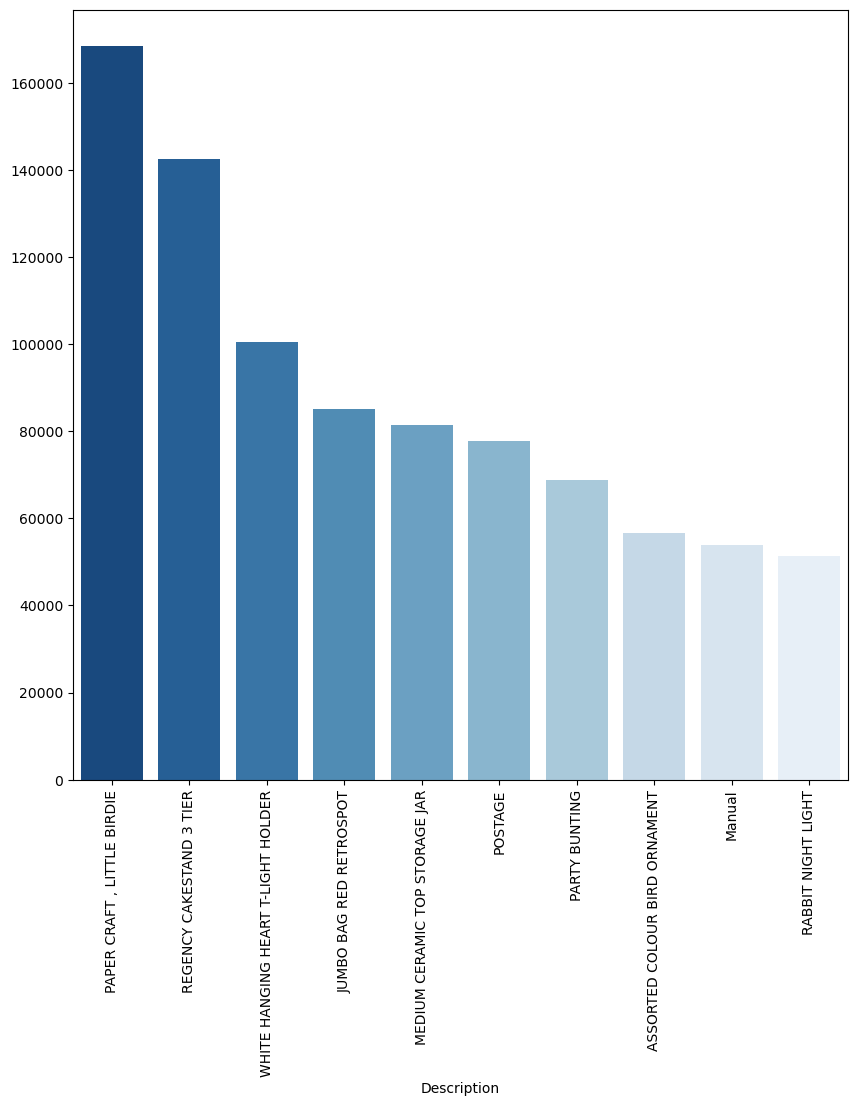

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(prod_sales[:10].index,prod_sales[:10].values,palette = "Blues_r")
plt.xticks(rotation='90')


In [27]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour,Minute,Date,TotalSales,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12,50,2011-12-09,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12,50,2011-12-09,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12,50,2011-12-09,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12,50,2011-12-09,16.60,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,12,50,2011-12-09,14.85,12


In [28]:
day='2012-01-01'
day=pd.to_datetime(day)

recency = df.groupby(['CustomerID']).agg({'Date':lambda x:((day-x.max()).days)})
recency

,Date
CustomerID,
12346.0,348
12347.0,25
12348.0,98
12349.0,41
12350.0,333
...,...
18280.0,300
18281.0,203
18282.0,30


In [29]:
freq=df.drop_duplicates(subset='InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()
freq

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


In [30]:
monetary=df.groupby(['CustomerID'])[['TotalSales']].sum()
monetary

,TotalSales
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [44]:
RFM=pd.concat([recency,freq,monetary],axis=1)
recency.columns=['Recency']
freq.columns=['Freqency']
monetary.columns=['Monetary']
RFM

,Recency,Freqency,Monetary
CustomerID,,,
12346.0,348,1,77183.60
12347.0,25,7,4310.00
12348.0,98,4,1797.24
12349.0,41,1,1757.55
12350.0,333,1,334.40
...,...,...,...
18280.0,300,1,180.60
18281.0,203,1,80.82
18282.0,30,2,178.05


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(RFM)

In [33]:
from sklearn.cluster import KMeans

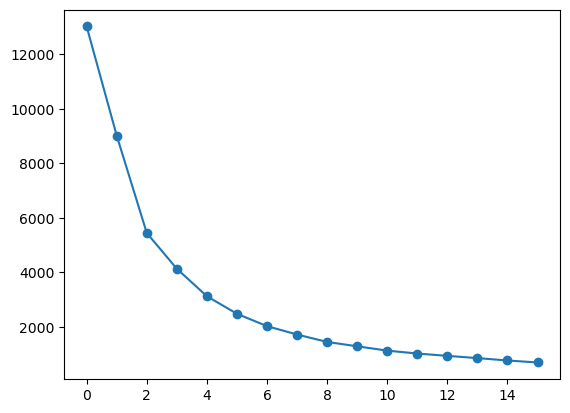

In [34]:
wcss=[]

for i in range(1,17):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=None)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(wcss,marker='o')

In [35]:
# number of cluster = 4
# train the model

In [36]:
from sklearn.metrics import silhouette_score
for num in range(2,16):
    
    clusters = KMeans(n_clusters=num,random_state=0)
    rfm_test = clusters.fit_predict(rfm_scaled)
    
    sil_avg = silhouette_score(rfm_scaled, rfm_test)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.8958528715697585
For 3 The Silhouette Score is = 0.5938712415770943
For 4 The Silhouette Score is = 0.6160983833605996
For 5 The Silhouette Score is = 0.6165913268227111
For 6 The Silhouette Score is = 0.5982341635958884
For 7 The Silhouette Score is = 0.5173026466635793
For 8 The Silhouette Score is = 0.47694442418475885
For 9 The Silhouette Score is = 0.4779537487413262
For 10 The Silhouette Score is = 0.482281250610973
For 11 The Silhouette Score is = 0.42563479040124913
For 12 The Silhouette Score is = 0.4184864765988625
For 13 The Silhouette Score is = 0.4192595173233657
For 14 The Silhouette Score is = 0.41609073418136544
For 15 The Silhouette Score is = 0.41243781731645396


In [37]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=None)
y_means=kmeans.fit_predict(rfm_scaled)
y_means



array([3, 0, 0, ..., 0, 3, 0])

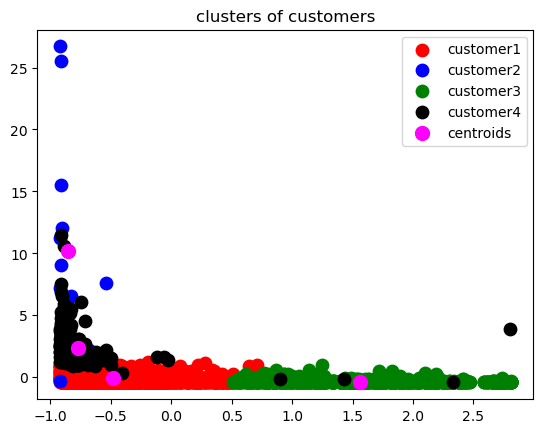

In [38]:
plt.scatter(rfm_scaled[y_means==0,0],rfm_scaled[y_means==0,1],s=80,c='red',label='customer1')
plt.scatter(rfm_scaled[y_means==1,0],rfm_scaled[y_means==1,1],s=80,c='blue',label='customer2')
plt.scatter(rfm_scaled[y_means==2,0],rfm_scaled[y_means==2,1],s=80,c='green',label='customer3')
plt.scatter(rfm_scaled[y_means==3,0],rfm_scaled[y_means==3,1],s=80,c='black',label='customer4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.title('clusters of customers')
plt.legend()
plt.show()

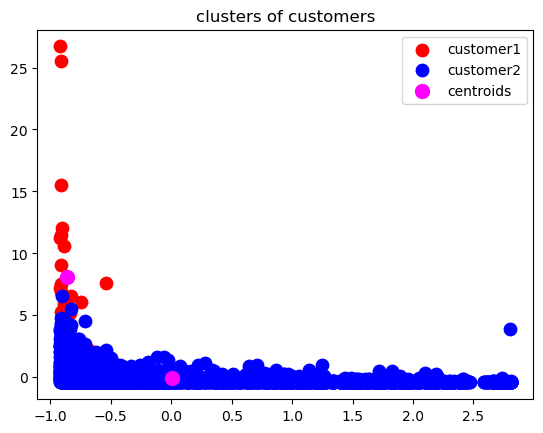

In [39]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=None)
y_mean=kmeans.fit_predict(rfm_scaled)
y_mean
plt.scatter(rfm_scaled[y_mean==0,0],rfm_scaled[y_mean==0,1],s=80,c='red',label='customer1')
plt.scatter(rfm_scaled[y_mean==1,0],rfm_scaled[y_mean==1,1],s=80,c='blue',label='customer2')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.title('clusters of customers')
plt.legend()
plt.show()


In [40]:
RFM

,Date,InvoiceNo,TotalSales
CustomerID,,,
12346.0,348,1,77183.60
12347.0,25,7,4310.00
12348.0,98,4,1797.24
12349.0,41,1,1757.55
12350.0,333,1,334.40
...,...,...,...
18280.0,300,1,180.60
18281.0,203,1,80.82
18282.0,30,2,178.05


In [46]:
RFM['Cluster_ID']=y_means
RFM

,Recency,Freqency,Monetary,Cluster_ID
CustomerID,,,,
12346.0,348,1,77183.60,3
12347.0,25,7,4310.00,0
12348.0,98,4,1797.24,0
12349.0,41,1,1757.55,0
12350.0,333,1,334.40,2
...,...,...,...,...
18280.0,300,1,180.60,2
18281.0,203,1,80.82,2
18282.0,30,2,178.05,0


<AxesSubplot:xlabel='Cluster_ID', ylabel='Monetary'>

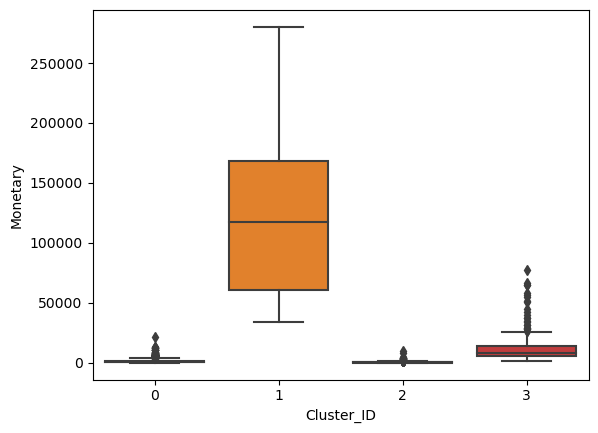

In [47]:
sns.boxplot(x='Cluster_ID',y='Monetary',data=RFM)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Recency'>

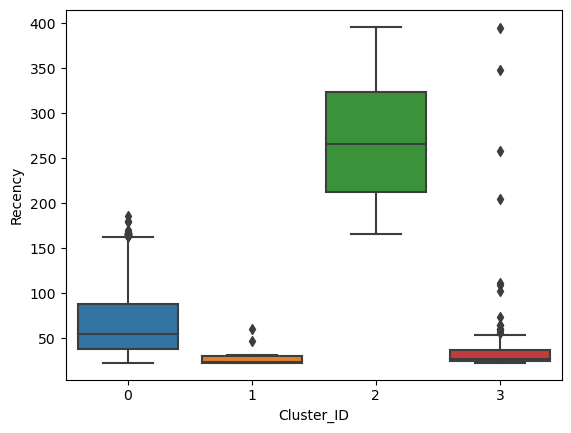

In [48]:
sns.boxplot(x='Cluster_ID',y='Recency',data=RFM)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Freqency'>

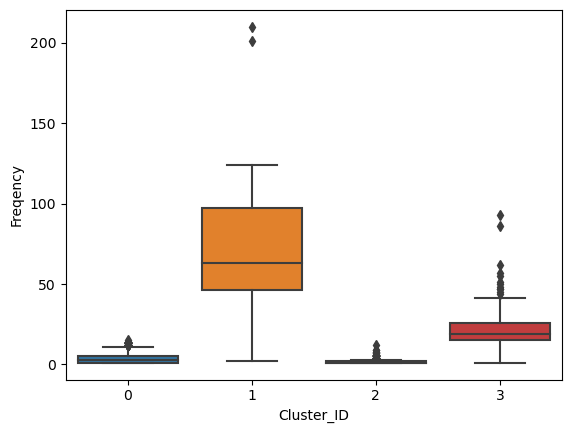

In [49]:
sns.boxplot(x='Cluster_ID',y='Freqency',data=RFM)